# *Bootcamp* IGTI - Analista de *Machine Learning*: Projeto Prático 1 -- Fundamentos

Aplicação dos conceitos de análise e modelamento de *Machine Learning* aprendidos no Módulo 1 do Bootcamp.


**Objetivos:**
* Conhecimento do dataset
* Limpeza dos dados
* Identificação de *Outliers*
* Análise de regressão linear


Para qualquer aplicação que utilize algoritmos de *Machine Learning*, precisamos realizar 7 etapas básicas:

* Coleta de dados
* Preparação dos dados
* Treinamento do modelo
* Avaliação do modelo
* Sintonia dos parâmetros
* Previsão


Mas antes de começar, vamos entender...

> ### **O que é Regressão Linear?**

É um dos algoritmos de *Machine Learning* mais conhecidos, ele é utilizado para estimar valores reais baseado na relação entre variáveis dependentes e independentes contínuas. 

Essa relação pode ser traduzida para uma equação matemática que tem como saída uma linha na qual vamos ajustando nosso parâmetros, para chegar o mais próximo possível dessa linha com os resultados do modelo de ML criado. 

Essa linhan é conhecida como **Linha de Regressão** e é representado por uma equação linear:

<p align="center"> Y = a * x + b </p>

Onde:
* Y - Variável Dependente
* a - Coeficiente Angular
* x - Variável Independente
* b - Intercepção

Os coeficientes a e b são derivados baseados na minimização da soma dos quadrados da diferença da distância entre os pontos da regressão linear.


In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# upload do aquivo data.csv
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
# importar o dataframe
df = pd.read_csv("data.csv")

# visualizar as primeiras entradas do dataset
df.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


In [13]:
# ver as características do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid_import       120 non-null    bool   
 1   item               120 non-null    object 
 2   importer_id        120 non-null    int64  
 3   exporter_id        120 non-null    int64  
 4   country_of_origin  120 non-null    object 
 5   declared_quantity  120 non-null    int64  
 6   declared_cost      120 non-null    float64
 7   mode_of_transport  120 non-null    object 
 8   route              120 non-null    object 
 9   date_of_departure  120 non-null    object 
 10  date_of_arrival    120 non-null    object 
 11  declared_weight    120 non-null    float64
 12  actual_weight      120 non-null    float64
 13  days_in_transit    120 non-null    float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


### **Quantas colunas e linhas existem no *dataset***

In [38]:
print("Número de Linhas:", df.shape[0])
print("Número de Colunas:", df.shape[1])

Número de Linhas: 120
Número de Colunas: 14


### **Vamos analisar se existem colunas com valores nulos**

In [15]:
df.isnull().sum()

valid_import         0
item                 0
importer_id          0
exporter_id          0
country_of_origin    0
declared_quantity    0
declared_cost        0
mode_of_transport    0
route                0
date_of_departure    0
date_of_arrival      0
declared_weight      0
actual_weight        0
days_in_transit      0
dtype: int64

### **Vamos analisar as estatísticas do *Dataset***

In [16]:
df.describe()

,importer_id,exporter_id,declared_quantity,declared_cost,declared_weight,actual_weight,days_in_transit
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
mean,111.0,222.0,127.458333,6743.649881,1264.702934,1306.429806,35.424705
std,0.0,0.0,14.641311,2991.797050,633.149971,656.911704,26.571591
min,111.0,222.0,100.000000,1441.012419,18.459509,19.275241,12.410325
25%,111.0,222.0,115.750000,4442.903914,820.314400,841.763738,18.225625
50%,111.0,222.0,131.500000,6010.218745,1255.597743,1305.716419,27.044293
75%,111.0,222.0,139.000000,8887.095370,1711.314045,1763.681083,44.356374
max,111.0,222.0,149.000000,14281.325362,2806.338955,2918.681683,147.787560


Pela tabela podemos encontrar, facilmente, informações importantes como a média e o desvio-padrão das variáveis.

### **Existem *outliers* nas variáveis ``declared_quantity`` e ``days_in_transit``?**

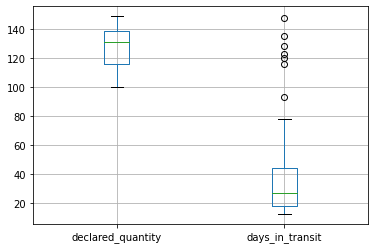

In [ ]:
# identificar possíveis outliers
df[['declared_quantity', 'days_in_transit']].boxplot();

A partir dos gráficos, chegamos a conclusão que na variável ```days_in_transit``` existem possíveis *outliers*.

## Aplicar o modelo de *Machine Learning*




In [21]:
# realizando a análise da regressão
x = df.declared_weight.values  # variável independente
y = df.actual_weight  # variável dependente

In [22]:
# importar o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [23]:
# realiza a contrução do modelo de regressão
reg = LinearRegression()
x_reshapeed = x.reshape((-1, 1))  # transforma os dados para o plano 2D
regressao = reg.fit (x_reshapeed, y)  #encontra os coeficientes (realiza a regressão)

In [24]:
# realiza a previsão
previsao = reg.predict(x_reshapeed)

In [25]:
# análise do modelo
from sklearn.metrics import r2_score

In [26]:
# parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_, reg.intercept_))

R_2 = r2_score(y, previsao)  # calcula o R2

print("Coeficiente de Correlação (R2):", R_2)

Y = [1.03718115]X -5.296233030439225
Coeficiente de Determinação (R2): 0.9993288165644932


### **Pelo Coeficiente de Correlação (R2), o que é possível afirmar sobre a relação entre as variáveis?**

Podemos afirmar que a análise possui um bom 'fit' dos dados, ou seja, é possível prever o peso real de um indivíduo a partir do seu peso declarado.

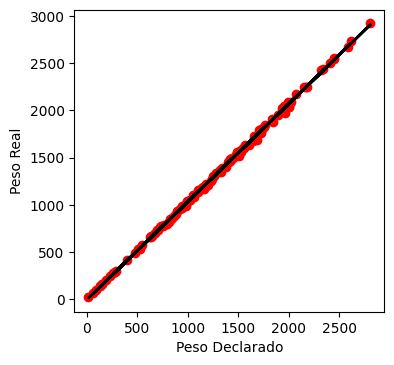

In [36]:
# plotar o gráfico dos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x, y, color='red')  # plota o gráfio de dispersão
plt.plot(x, previsao, color='black', linewidth = 2)  # plota a linha do gráfico
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")
plt.show();